In [1]:
import pandas as pd
data = pd.read_csv('C:/Users/hp/Desktop/prj_pfe_inwi/ma_data.csv')   

In [2]:
data.columns


Index(['dn', 'contract_id', 'profile_id', 'produit', 'gamme', 'full_vol',
       'full_ci', 'full_secteur', 'full_city', 'full_region', 'source', 'unit',
       'mdn', 'idnt_client_crm', 'idnt_compte_facturation', 'desc_profil',
       'gamme.1', 'idnt_date', 'a_number', 'a_own', 'b_number', 'duration',
       'duration_wh', 'num_interactions', 'num_interactions_wh',
       'num_interactions_sms', 'num_interactions_sms_wh', 'offnet',
       'start_date', 'end_date'],
      dtype='object')

In [3]:
data.shape

(99999, 30)

In [4]:


# Compter le nombre d'occurrences des valeurs distinctes dans chaque colonne
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Colonne '{column}':")
    print(value_counts)
    print()


Colonne 'dn':
ace72ed3489cf8627cb080486c8226692bcbba540457ffbd9a9883276088d171    117
5f2bc4e1b0da80851585a048f214417d21a4e72c2741bae7f67168eec5cf5800    111
3978cad020532f2679a0038f034c48b8c5c10cbfc02e19b1e046f53cd66a8310    105
d03c8e0141fc0f4741c393eac201418846e696dbd99cf8284976d45494d6d0b0     88
d46cc68d80009fb2286afd37b0d972890702fde38c1d072596dd05ded7b18973     86
                                                                   ... 
1e8c40ed921ed77f1446a9b8567fdbe342e90ef802e6b4e152fb90d1a6ab0c35      1
6d4f458759a6df46dc3bef21f268972cbb386b69089210537d613c70d524abfd      1
09f7da4b32a32211a5a5453d22b5818b8fde9e39b5a57958cfa69ee1af4fbf6d      1
c705defc2cef428d6017397975250325bb5b598cc8b9da11f6128b4defd50cec      1
33ef10eefcc836fab96044dfe291f694024d70d19b46157fe8014f674db5191e      1
Name: dn, Length: 39091, dtype: int64

Colonne 'contract_id':
116d5f23085f285cd971d4e5443567298e76d8bf2c157f6dbc2a550c930366e1    433
312e314a0953cdb38f5f93a244865ef10c36dbd44da58a862312878c7359

Colonne 'idnt_client_crm':
8ecb10e97c8b9380e01d4171017ab72c02fbd82d5ca9965a887166e6050b8648    433
bb48c02d870b6e2f3b4ea238ee41a67a1e1096f4181f351868f1050461942e0b    117
4a775f2b34c18597eaaeb6a5a4b60b970e2b2969f4673d107856577c85a3c95c    111
c8a4cc8534a7d2e25a52fcb9358c93c0fe39aecc07d0c98db15a7e09bb7fe57d    105
c0a44e8ae1aae3c72747553bdb09e33ce76a05bc25975b1a27a7e012f10585be     88
                                                                   ... 
1a2dc118361c58065020519a204dff6b8da15cbc6b68d4930e8969aaaedfc8b1      1
d8c42c1954107d442ab9c4d52ee792e3ce4bbb9df348e00da440cf30f8a3ce86      1
dfb7b1aca4cc9799ffb49bf147588db3ab8c321a2ca151b1e5c272b75e22b229      1
1b015c8710e9813aea68d7bb5cbf5be1146eed3060709956c5cbd98267ee2824      1
5fe0fb70acbf75c4639b4578830412f5f5060ed4e52abec20c856166c812c24b      1
Name: idnt_client_crm, Length: 38922, dtype: int64

Colonne 'idnt_compte_facturation':
8ecb10e97c8b9380e01d4171017ab72c02fbd82d5ca9965a887166e6050b8648    433
9d2c4f1ca19932945b9d53

In [3]:
columns_to_drop1 =['start_date','end_date','idnt_date','full_region']
data = data.drop(columns=columns_to_drop1)


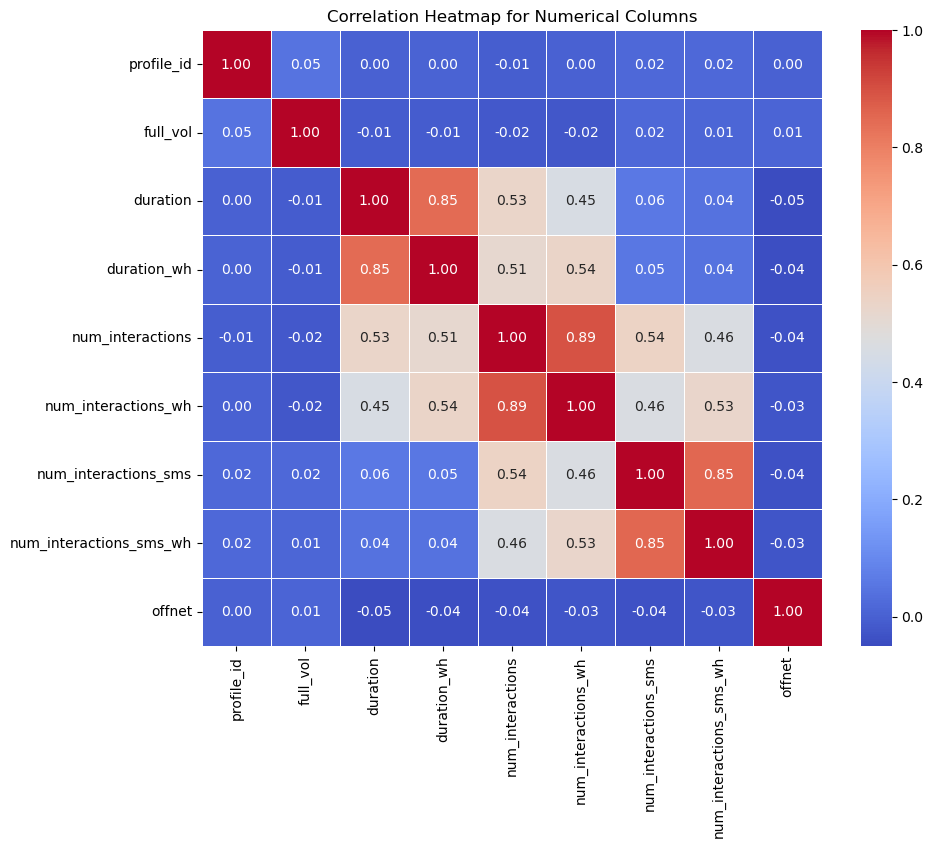

duration - duration_wh: 0.85
duration_wh - duration: 0.85
num_interactions - num_interactions_wh: 0.89
num_interactions_wh - num_interactions: 0.89
num_interactions_sms - num_interactions_sms_wh: 0.85
num_interactions_sms_wh - num_interactions_sms: 0.85


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'data' is your DataFrame
numerical_columns = data.select_dtypes(include='number')
# Calculate Pearson correlation
correlation_numerical = numerical_columns.corr()
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_numerical, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()
# Define the threshold correlation value
my_coor = 0.8
# Find column pairs with correlation greater than my_coor
correlation_pairs = []
for col1 in correlation_numerical.columns:
    for col2 in correlation_numerical.columns:
        if col1 != col2 and abs(correlation_numerical.loc[col1, col2]) > my_coor:
            correlation_pairs.append((col1, col2, correlation_numerical.loc[col1, col2]))
# Print the column pairs with correlation greater than my_coor
for col1, col2, corr in correlation_pairs:
    print(f"{col1} - {col2}: {corr:.2f}")

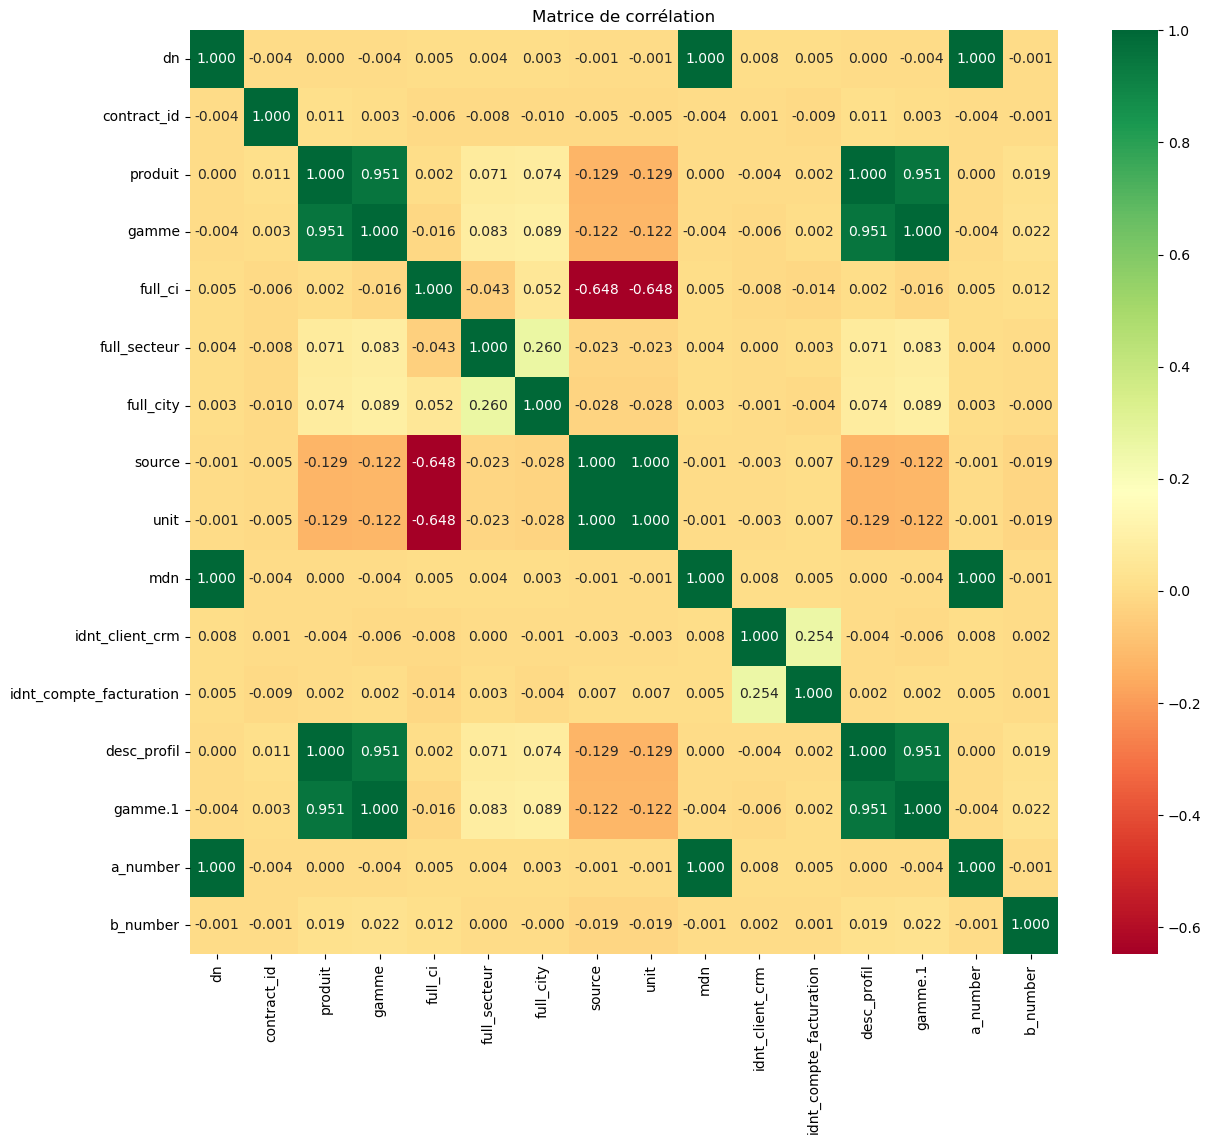

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = data.select_dtypes(include=['object', 'category']).columns
correlation_matrix = data[categorical_columns].apply(lambda x: x.astype('category').cat.codes).corr(method='pearson')

plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='RdYlGn')
plt.title('Matrice de corrélation')
plt.show()

In [6]:
data[['full_vol']].describe()



full_vol
count  9.999900e+04
mean   9.768454e+07
std    3.296310e+08
min    0.000000e+00
25%    1.550000e+00
50%    6.233333e+00
75%    1.570000e+02
max    9.419667e+09

In [7]:
import pandas as pd
filtered_data = data[data['source'] == 'VOICE']

filtered_data[['full_vol']].describe()


full_vol
count  72951.000000
mean       8.427773
std       16.373123
min        0.016667
25%        1.150000
50%        3.383333
75%        9.266667
max      546.783333

In [8]:
data.loc[data['source'] == 'VOICE', 'full_vol'] *= 10**7



In [9]:
data[['full_vol']].describe()



full_vol
count  9.999900e+04
mean   1.591666e+08
std    3.429331e+08
min    0.000000e+00
25%    1.033333e+07
50%    4.166667e+07
75%    1.520000e+08
max    9.419667e+09

In [10]:
import pandas as pd
filtered_data = data[data['source'] == 'VOICE']

filtered_data[['full_vol']].describe()


full_vol
count  7.295100e+04
mean   8.427773e+07
std    1.637312e+08
min    1.666667e+05
25%    1.150000e+07
50%    3.383333e+07
75%    9.266667e+07
max    5.467833e+09

In [11]:
import pandas as pd
filtered_data = data[data['source'] == 'DATA']
filtered_data[['full_vol']].describe()

full_vol
count  2.704800e+04
mean   3.611489e+08
std    5.536887e+08
min    0.000000e+00
25%    6.371300e+05
50%    1.708174e+08
75%    5.076346e+08
max    9.419667e+09

In [23]:
import pandas as pd
import numpy as np

# Appliquer la transformation logarithmique sur la colonne "full_vol"
data['full_vol'] = np.log(data['full_vol']+1)
data['duration'] = np.log(data['duration']+1)
data['num_interactions'] = np.log(data['num_interactions']+1)
data['num_interactions_sms'] = np.log(data['num_interactions_sms']+1)

In [22]:
data['duration_wh'] = np.log(data['duration_wh']+1)
data['num_interactions_wh'] = np.log(data['num_interactions_wh']+1)
data['num_interactions_sms_wh'] = np.log(data['num_interactions_sms_wh']+1)

In [19]:
data.columns

Index(['dn', 'contract_id', 'profile_id', 'produit', 'gamme', 'full_vol',
       'full_ci', 'full_secteur', 'full_city', 'source', 'unit', 'mdn',
       'idnt_client_crm', 'idnt_compte_facturation', 'desc_profil', 'gamme.1',
       'a_number', 'a_own', 'b_number', 'duration', 'duration_wh',
       'num_interactions', 'num_interactions_wh', 'num_interactions_sms',
       'num_interactions_sms_wh', 'offnet'],
      dtype='object')

In [21]:
colonnes_a_supprimer = ['profile_id', 'gamme','full_ci','unit','mdn','idnt_client_crm','idnt_compte_facturation','desc_profil', 'gamme.1',
       'a_number']  # Liste des noms de colonnes à supprimer
data = data.drop(colonnes_a_supprimer, axis=1)

In [15]:
data[['full_vol', 'duration','num_interactions','num_interactions_sms', 'duration_wh','num_interactions_wh','num_interactions_sms_wh']].describe()



full_vol      duration  num_interactions  num_interactions_sms  \
count  99999.000000  99999.000000      99999.000000          99999.000000   
mean      16.917964      4.259884          1.308764              0.094298   
std        3.504932      1.899741          0.795004              0.404663   
min        0.000000      0.000000          0.693147              0.000000   
25%       16.150886      3.218876          0.693147              0.000000   
50%       17.545212      4.330733          1.098612              0.000000   
75%       18.839391      5.476464          1.609438              0.000000   
max       22.966066     12.394919          6.527958              6.490724   

        duration_wh  num_interactions_wh  num_interactions_sms_wh  
count  99999.000000         99999.000000             99999.000000  
mean       2.529234             0.722176                 0.045865  
std        2.405252             0.762827                 0.272537  
min        0.000000             0.000000                 0.000000  
25%        0.000000             0.000000                 0.000000  
50%        2.833213             0.693147                 0.000000  
75%        4.532599             1.098612                 0.000000  
max       11.277722             5.978886                 5.777652

<Axes: >

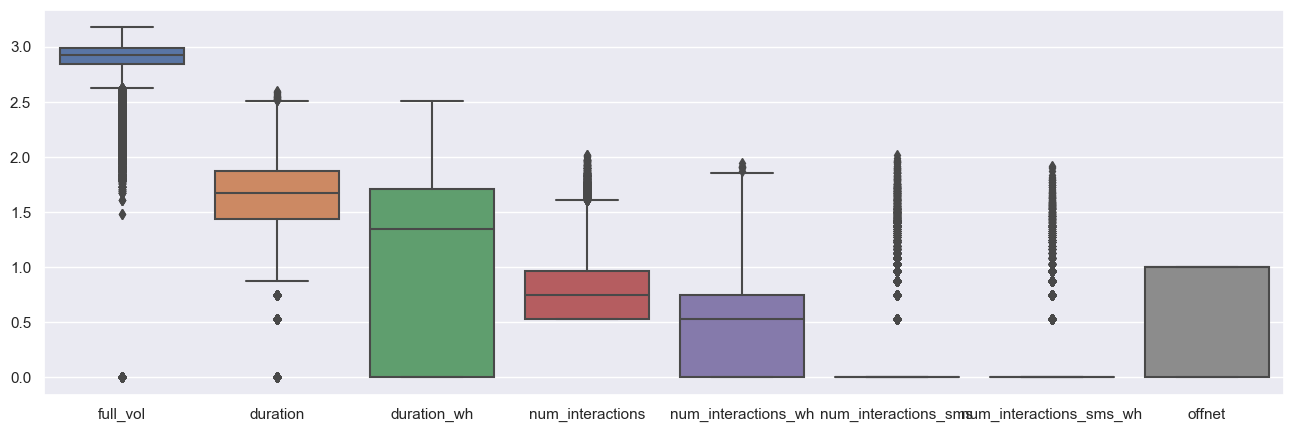

In [24]:
import matplotlib as plt
import seaborn as sns
# Box plot for all the numerical variables
sns.set(rc={'figure.figsize': (16, 5)})
 
# multiple box plot illustration
sns.boxplot(data=data.select_dtypes(include='number'))

In [25]:
import pandas as pd
data_voice = data[data['source'] == 'VOICE']
data_data = data[data['source'] == 'DATA']

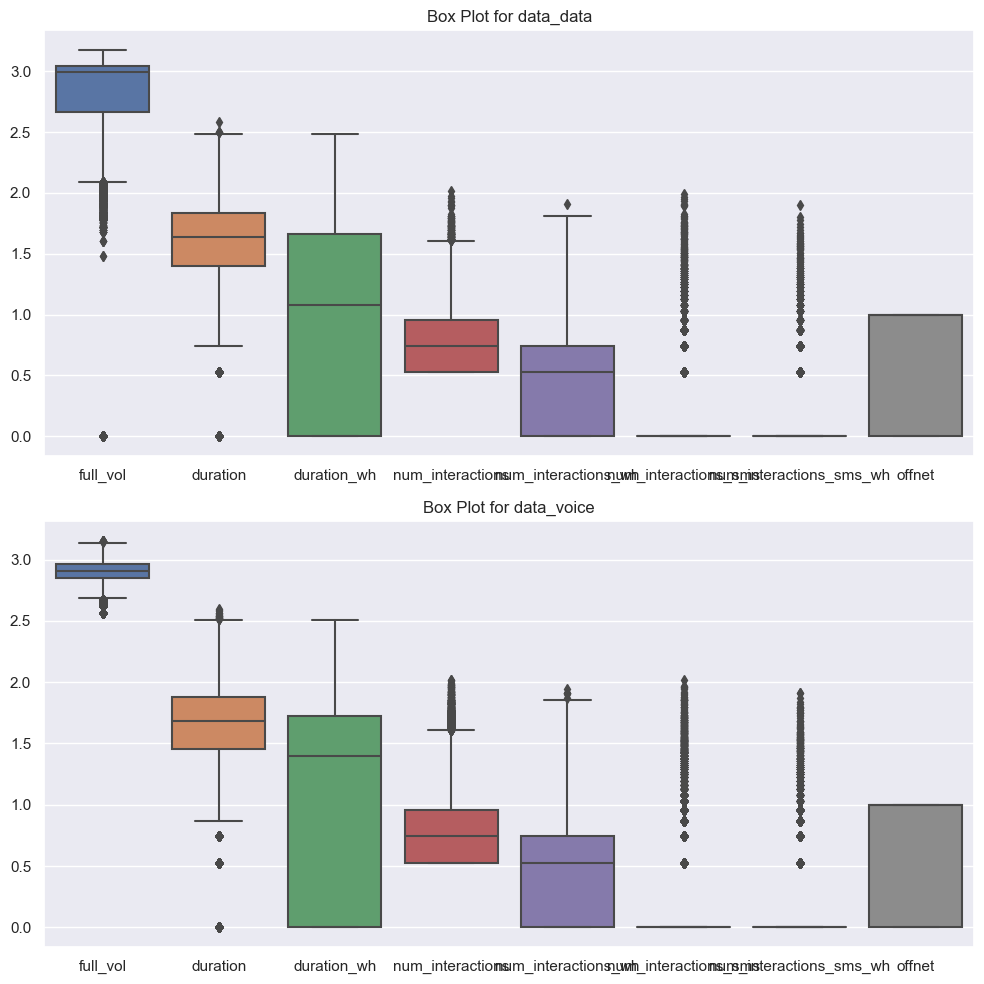

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

# Create a subplot grid
plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1
sns.boxplot(data=data_data.select_dtypes(include='number'))
plt.title('Box Plot for data_data')

plt.subplot(2, 1, 2)  # 2 rows, 1 column, subplot 2
sns.boxplot(data=data_voice.select_dtypes(include='number'))
plt.title('Box Plot for data_voice')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

<Axes: >

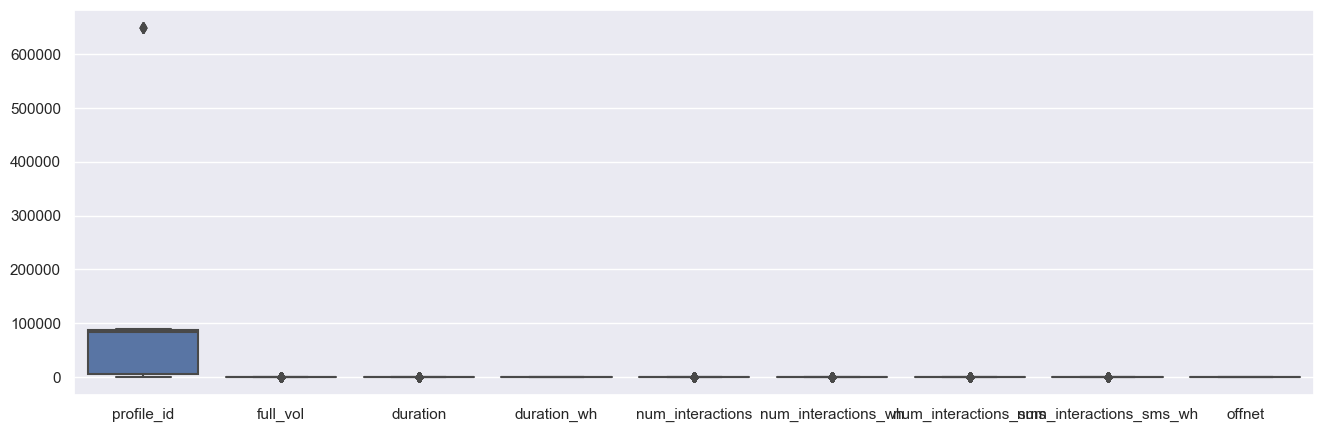

In [16]:
import matplotlib as plt
import seaborn as sns
# Box plot for all the numerical variables
sns.set(rc={'figure.figsize': (16, 5)})
 
# multiple box plot illustration
sns.boxplot(data=data.select_dtypes(include='number'))

In [41]:
columns_to_drop1 =['unit','idnt_client_crm','idnt_compte_facturation','desc_profil']
data = data.drop(columns=columns_to_drop1)


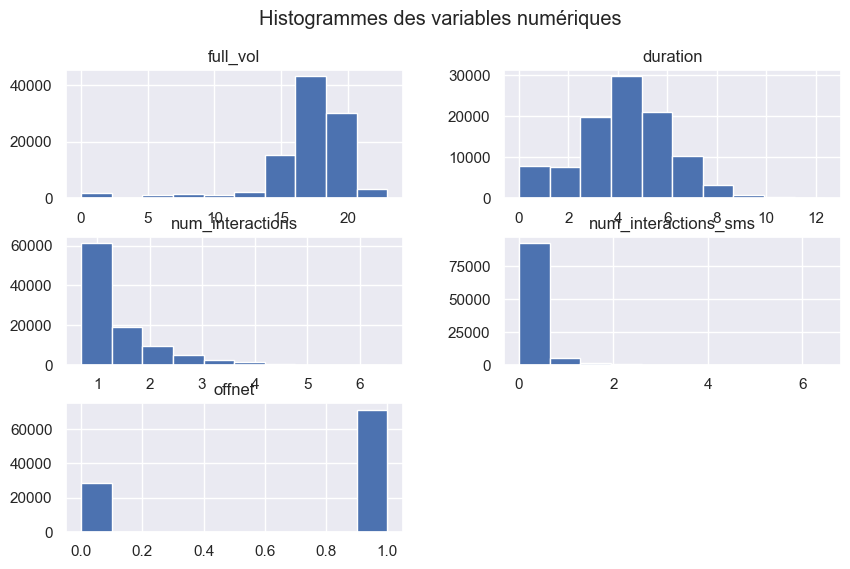

In [20]:
import matplotlib.pyplot as plt
data.hist(figsize=(10, 6))
plt.suptitle("Histogrammes des variables numériques")
plt.show()

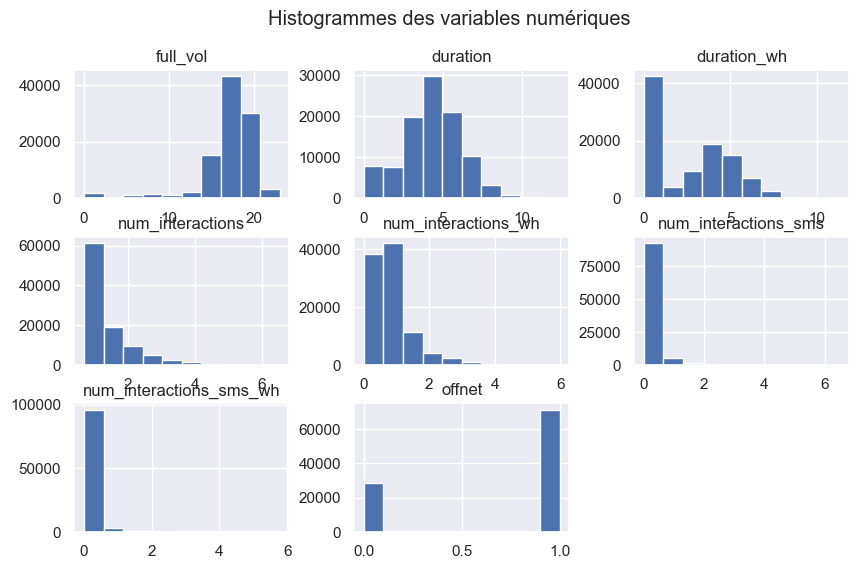

In [22]:
import matplotlib.pyplot as plt
data.hist(figsize=(10, 6))
plt.suptitle("Histogrammes des variables numériques")
plt.show()

In [15]:
print(data.describe())

           full_vol      duration  num_interactions  num_interactions_sms  \
count  9.999900e+04  99999.000000      99999.000000          99999.000000   
mean   9.794681e-03      4.259884          1.308764              0.094298   
std    3.129635e-02      1.899741          0.795004              0.404663   
min    0.000000e+00      0.000000          0.693147              0.000000   
25%    1.645493e-10      3.218876          0.693147              0.000000   
50%    6.617360e-10      4.330733          1.098612              0.000000   
75%    1.666726e-08      5.476464          1.609438              0.000000   
max    6.931472e-01     12.394919          6.527958              6.490724   

             offnet  
count  99999.000000  
mean       0.715017  
std        0.451409  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  


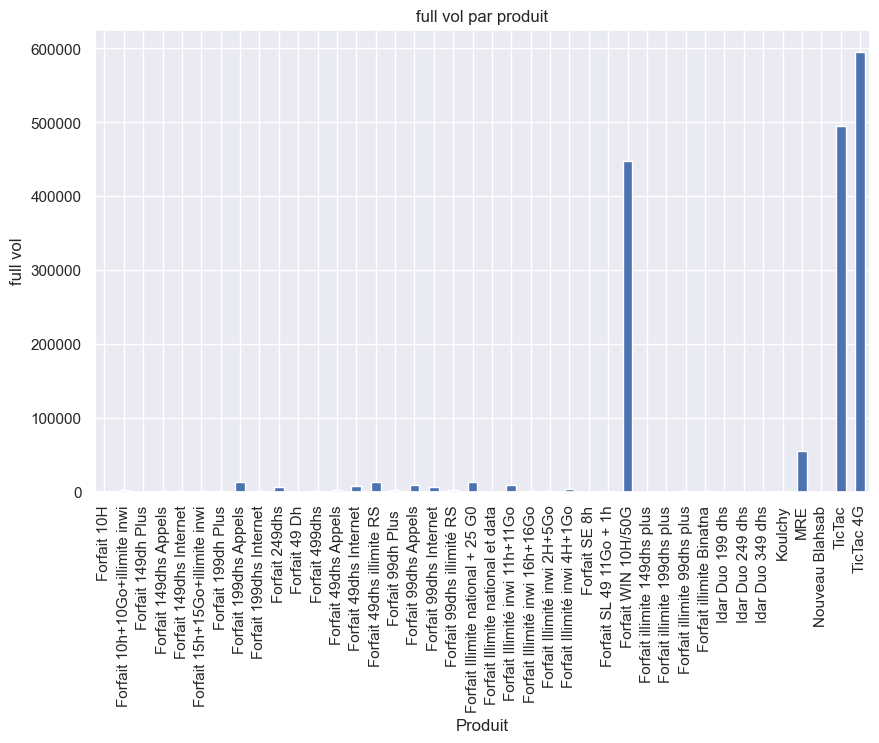

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 6))
df_grouped = data.groupby('produit')['full_vol'].sum()
df_grouped.plot(kind='bar')
plt.title('full vol par produit')
plt.xlabel('Produit')
plt.ylabel('full vol')
plt.show()

In [13]:
data.dtypes

dn                       object
contract_id              object
produit                  object
full_vol                float64
full_secteur             object
full_city                object
source                   object
unit                     object
a_own                      bool
b_number                 object
duration                float64
num_interactions          int64
num_interactions_sms      int64
offnet                    int64
dtype: object

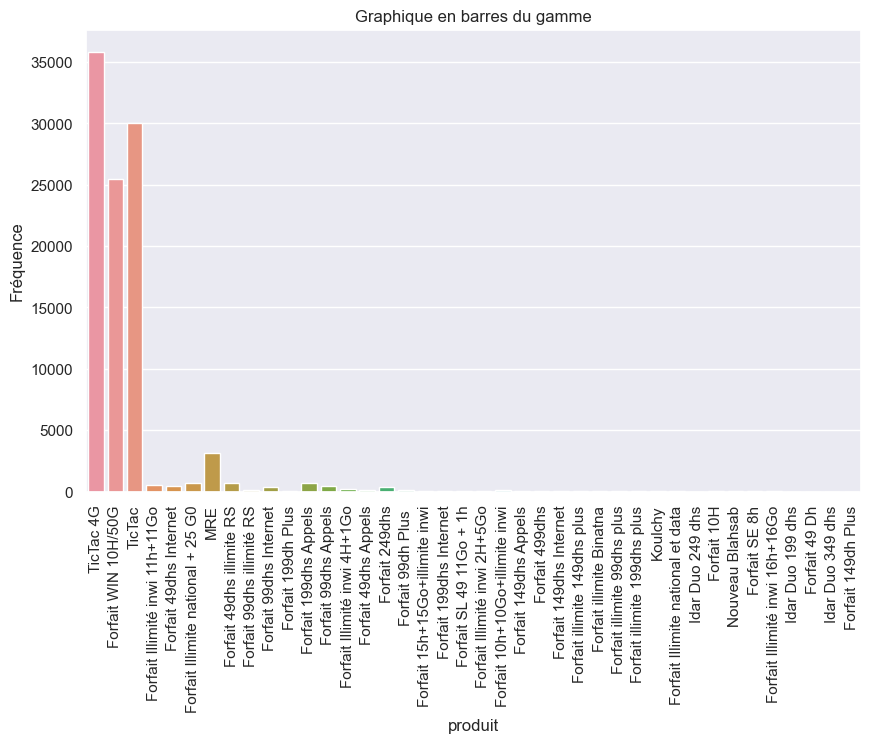

In [16]:
import matplotlib.pyplot as plt
# Graphique en barres d'une variable catégorielle
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='produit')
plt.title("Graphique en barres du gamme")
plt.xlabel("produit")
plt.ylabel("Fréquence")
plt.xticks(rotation=90)
plt.show()



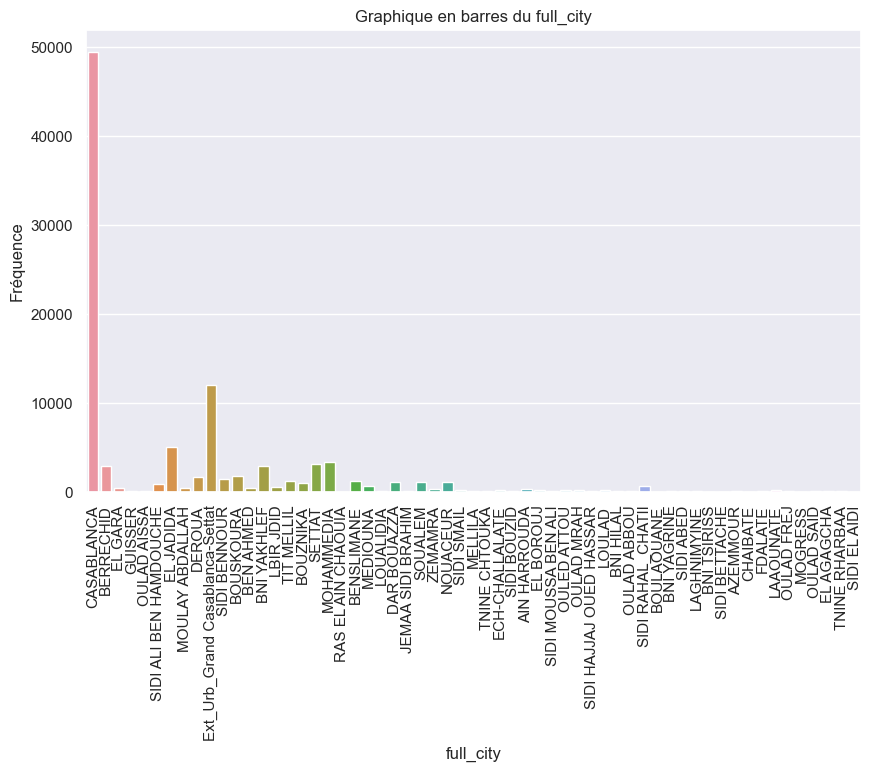

In [17]:
import matplotlib.pyplot as plt
# Graphique en barres d'une variable catégorielle
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='full_city')
plt.title("Graphique en barres du full_city")
plt.xlabel("full_city")
plt.ylabel("Fréquence")
plt.xticks(rotation=90)
plt.show()

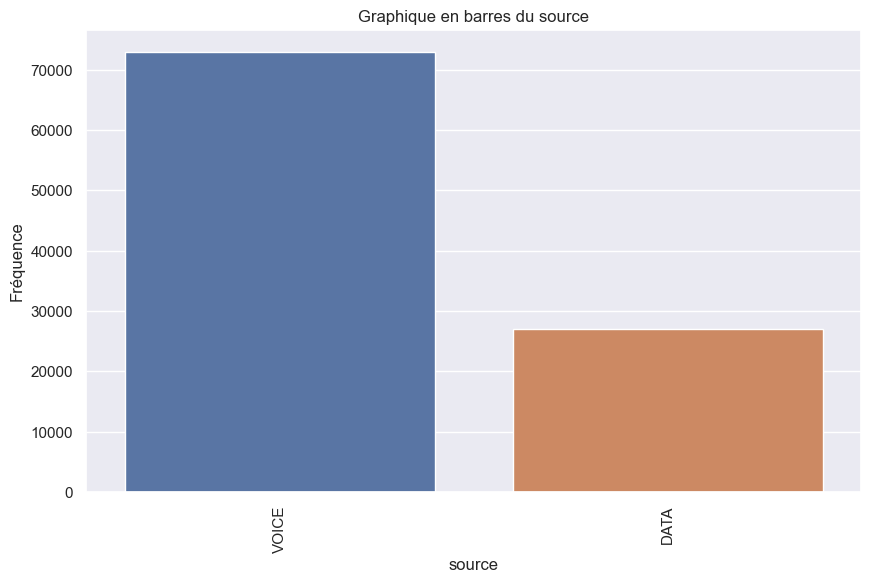

In [18]:
import matplotlib.pyplot as plt
# Graphique en barres d'une variable catégorielle
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='source')
plt.title("Graphique en barres du source")
plt.xlabel("source")
plt.ylabel("Fréquence")
plt.xticks(rotation=90)
plt.show()

In [19]:
data.shape

(99999, 13)

In [23]:
data.to_csv('C:/Users/hp/Desktop/prj_pfe_inwi/ma_data_prep.csv', index=False)

In [21]:
# Filtrer les colonnes catégorielles de type 'object'
colonnes_categorielles = data.select_dtypes(include=['object'])
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for colonne in colonnes_categorielles.columns:
    # Encoder la variable catégorielle
    encoded_variable = label_encoder.fit_transform(data[colonne])
    # Assigner les valeurs encodées à la colonne correspondante dans la dataframe
    data[colonne] = encoded_variable

In [22]:
data.columns

Index(['dn', 'contract_id', 'produit', 'full_vol', 'full_secteur', 'full_city',
       'source', 'a_own', 'b_number', 'duration', 'num_interactions',
       'num_interactions_sms', 'offnet'],
      dtype='object')

In [6]:
from sklearn.preprocessing import MinMaxScaler
# Créer un objet MinMaxScaler
scaler = MinMaxScaler()

# Transformer les données en utilisant le scaler
data['full_vol']= scaler.fit_transform([[value] for value in data['full_vol']])

# Afficher les données normalisées
for normalized_value in data['full_vol']:
    print(normalized_value)

2.4753174693454807e-09
3.7156302256079416e-11
1.5570259993023754e-10
1.8755085900687705e-10
0.02295927015449207
3.18482590766395e-11
8.422095178044669e-10
3.5386954529599446e-11
3.18482590766395e-10
7.714356087452679e-10
3.6979367483431423e-10
0.03271262040333604
2.921193096418434e-09
4.724158429701527e-10
5.856540974648708e-10
3.4148411121063466e-10
4.069499770903936e-11
7.464878058019003e-09
0.27273551033738885
1.1500760222119819e-10
1.2438514517154206e-09
0.043726216136802956
1.9462824991279695e-10
3.784634786940661e-09
1.0527618972555834e-09
2.724795498779158e-10
2.365617910303723e-09
3.556388930224744e-10
3.538695452959944e-10
5.290349702175117e-10
1.2332353653565408e-09
1.7693477264799717e-11
0.04768669843221369
5.042641020467921e-10
1.7516542492151725e-10
6.840298310571574e-09
3.503308498430345e-10
4.635691043377527e-10
5.6619127247359115e-11
1.3800912266543785e-10
1.649032081079334e-09
2.3001520444239638e-10
1.3447042721247788e-10
3.4856150211655454e-10
5.76807358832471e-10
0.1

0.32114617097411163
7.466647405745483e-10
5.308043179439917e-10
0.0
2.9760428759393133e-09
1.592412953831975e-10
2.54963007385764e-09
5.838847497383909e-11
1.2208499312711808e-10
6.245797474474303e-10
1.2580062335272603e-09
1.716267294685573e-10
0.0
2.813262885103156e-10
1.5216390447727763e-09
0.028855865127555468
3.18482590766395e-11
6.015782270031906e-11
0.010156529038190146
4.600304088847928e-11
5.308043179439917e-12
3.9456454300503383e-10
0.13976259725498097
4.246434543551934e-11
7.077390905919889e-11
7.095084383184689e-10
1.2916238403303796e-10
0.07118216916750683
5.927314883707906e-10
0.05553390075643985
2.9873667013887855e-07
2.2293781353647652e-10
0.1233660162036409
7.962064769159875e-11
9.777415536528327e-08
0.01165572426092207
1.716267294685573e-10
5.838847497383909e-11
1.27393036306558e-10
4.632152347924568e-09
0.011439755589597608
0.07279079893637805
3.007891135015953e-11
1.2208499312711808e-10
5.838847497383909e-11
4.9541736341439224e-11
1.6101064310967747e-10
1.3358575334

2.4480695143576895e-07
7.944371291895076e-10
1.787041203744772e-10
8.09158102273821e-07
5.750380111059911e-10
5.484977952087915e-10
8.492869087103868e-11
0.0
2.1409107490407663e-10
7.951448682800996e-08
0.010783124001924129
0.0
1.3217027516805392e-09
0.0
1.0474538540761437e-09
1.8967407627865302e-09
1.90735684914541e-09
4.3172084526111323e-10
0.028149538471866575
8.616723427957466e-10
6.546586587975898e-11
1.6932657742413335e-09
4.0694997709039363e-10
1.0616086358879835e-11
1.362397749389579e-10
1.1960790631004613e-09
0.013295664371774115
3.7156302256079416e-11
0.0
1.3765525312014187e-09
1.7516542492151726e-09
5.714993156530311e-10
4.794932338760725e-10
8.31593431445587e-11
0.03388152571789236
0.001656893788445448
2.512473771601561e-10
2.1639122694850062e-09
4.9541736341439224e-11
2.813262885103156e-10
3.7333237028727414e-10
1.1854629767415814e-10
4.246434543551934e-11
0.048099415350509864
2.937117225956754e-10
0.02270208463404012
1.468558612978377e-10
1.157153413117902e-09
1.910895544